# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier aperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de conusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification de nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# Pour RNC
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
print(X.shape)
df = pd.read_csv("data.csv",nrows=5000)

(5000, 400)


In [ ]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

Afficher aléatoirement quelques données de notre base

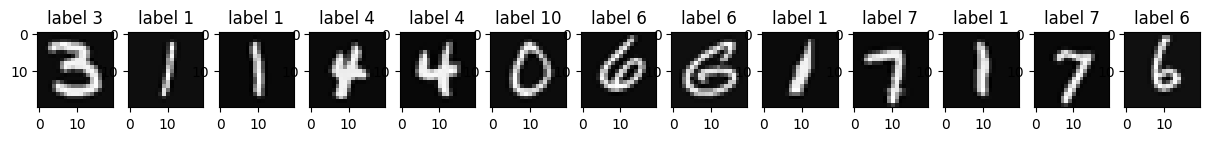

In [ ]:
plt.figure(figsize=(15,8))
for i in range(13): #note: each 500 lines, there is a new value
    c = random.randint(X.shape[0]) #pick a random line from the dataset
    a = X[c,:].reshape((20, 20)) #shape of one number in the image
    a=np.transpose(a) # la transposé (rendre les ligne des colonne et vice versa)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de confusion :

In [ ]:
def confusion_matrix_perso(true_labels, predicted_labels, classe):
    # Initialisation de la matrice de confusion avec des zéros
    conf_matrix =  np.zeros((2, 2))

    # Remplissage de la matrice de confusion en parcourant les vraies étiquettes de classe (labels) et les prédictions du modèle
    for true, pred in zip(true_labels, predicted_labels):
      if(true==classe):
        if(pred==classe):
          conf_matrix[1][1] += 1 #True positive , exemple classe=1 true=1 pred=1
        else:
          conf_matrix[1][0] += 1 #False negative, exemple classe=1 true=1 pred!=1
      else:
        if(pred==classe):
          conf_matrix[0][1] += 1 #False positive , exemple classe=1 true!=1 pred=1
        else:
          conf_matrix[0][0] += 1 #True neagtive , exemple classe=1 true!=1 pred!=1

    return conf_matrix

In [ ]:
def global_confusion_matrix(true_labels, predicted_labels, num_classes):
    # contient les moyennes de TP TN FP FN de toutes les classes
    # Initialisation de la matrice de confusion avec des zéros
    matrix = np.zeros((2, 2))

    # Somme des TP TN FP FN sur toutes les classes
    total_TP = 0
    total_TN = 0
    total_FP = 0
    total_FN = 0

    # Calculer les TP TN FP FN pour chaque classe
    for i in range(1, num_classes + 1):  # pour que i prenne les valeurs de 1 jusqu'à 10 inclusivement
        conf_matrix = confusion_matrix_perso(true_labels, predicted_labels, i) # calculer le matrice de confusion pour la classe i
        #print(str(i))
        total_TP += conf_matrix[1][1]  # True Positives
        total_TN += conf_matrix[0][0]  # True Negatives
        total_FP += conf_matrix[0][1]  # False Positives
        total_FN += conf_matrix[1][0]  # False Negatives

    # Calculer les moyennes sur toutes les classes
    #print('TP=' + str(total_TP) + ' TN=' + str(total_TN) + ' FP=' + str(total_FP) + ' FN=' + str(total_FN))
    matrix[1][1] = total_TP / num_classes
    matrix[0][0] = total_TN / num_classes
    matrix[0][1] = total_FP / num_classes
    matrix[1][0] = total_FN / num_classes

    return matrix



- Accuracy = (TP + TN)/(TP + TN + FP + FN)

In [ ]:
def accuracy_score_perso(conf_matrix): # passer la matrice de cobfusion comme parama pour eviter de la calculer à chaque calcule d'une métrique
    #conf_matrix = compute_confusion_matrix(y_true, y_pred)
    TP = conf_matrix[1][1]  # True Positives
    TN = conf_matrix[0][0]  # True Negatives
    FP = conf_matrix[0][1]  # False Positives
    FN = conf_matrix[1][0]  # False Negatives

    accuracy = (TP + TN) / (TP + TN + FP + FN) # TP + TN + FP + FN est le nombre totale des echantillons
    #print(accuracy)
    return accuracy

- Recall (True Positive Rate) = TP/(TP + FN)

In [ ]:
def recall_score_perso(conf_matrix): # passer la matrice de cobfusion comme parama pour eviter de la calculer à chaque calcule d'une métrique
    #conf_matrix = compute_confusion_matrix(y_true, y_pred)
    TP = conf_matrix[1][1]  # True Positives
    FN = conf_matrix[1][0]  # False Negatives

    recall = (TP) / (TP + FN) # TP + FN est le nombre totale des echantillons positifs
    return recall

- Précision = TP/(TP + FP)

In [ ]:
def precision_score_perso(conf_matrix): # passer la matrice de cobfusion comme parama pour eviter de la calculer à chaque calcule d'une métrique
    #conf_matrix = compute_confusion_matrix(y_true, y_pred)
    TP = conf_matrix[1][1]  # True Positives
    FP = conf_matrix[0][1]  # False Positives

    precision = (TP) / (TP + FP)
    return precision

- Taux de FP (False Positive Rate) = FP / (FP + TN)

In [ ]:
def false_positive_rate_perso(conf_matrix): # passer la matrice de cobfusion comme parama pour eviter de la calculer à chaque calcule d'une métrique
    #conf_matrix = compute_confusion_matrix(y_true, y_pred)
    TN = conf_matrix[0][0]  # True Negatives
    FP = conf_matrix[0][1]  # False Positives

    rate = (FP) / (FP + TN) # FP + TN est le nombre totale des echantillons negatifs
    return rate

- Spécificité (True Negative Rate) = TN / (TN + FP)

In [ ]:
def true_negative_rate_perso(conf_matrix): # passer la matrice de cobfusion comme parama pour eviter de la calculer à chaque calcule d'une métrique
    #conf_matrix = compute_confusion_matrix(y_true, y_pred)
    TN = conf_matrix[0][0]  # True Negatives
    FP = conf_matrix[0][1]  # False Positives

    rate = (TN) / (FP + TN) # FP + TN est le nombre totale des echantillons negatifs
    return rate

- Courbe ROC

In [ ]:
def roc_curve(y_test,y_probs, classe):
  # Faire varier le seuil
  seuils = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Liste des seuils à tester
  tpr_list = []
  fpr_list = []
  for seuil in seuils:
    y_pred_binary = (y_probs[:, classe-1] > seuil).astype(int)  # Classement des observations en fonction du seuil
    # convertir ce vecteur binaire pour pouvoir le comparer avec le y_test ( qui contient des classes lors du calcule de la matrice de confusion)
    y_pred_class = [classe if pred == 1 else classe+1 for pred in y_pred_binary]
    conf_matrix = confusion_matrix_perso(y_test, y_pred_class, classe)
    fpr =   false_positive_rate_perso(conf_matrix)# Calcul des taux de vrais positifs et de faux positifs
    #print(fpr)
    tpr =   recall_score_perso(conf_matrix)
    #print(tpr)
    tpr_list.append(tpr)
    fpr_list.append(fpr)
  # Tracer les courbes ROC pour chaque classe
  plt.figure(figsize=(2,2))
  for i in range(len(seuils)):
    plt.plot(fpr_list[i], tpr_list[i])  # Tracer les courbes ROC avec une faible opacité

  # Tracer les points correspondant à chaque seuil en gras
  for i in range(len(seuils)):
    plt.scatter(fpr_list[i], tpr_list[i], marker='o', s=50, edgecolors='k', linewidth=1)

  plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Aléatoire')

  plt.title('Courbes ROC pour la classe'+str(classe))
  plt.xlabel('Taux de faux positifs')
  plt.ylabel('Taux de vrais positifs')
  plt.legend()
  plt.grid(True)
  plt.show()


# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
Xt, Xtt, Yt, Ytt = train_test_split(
      scaled_features, Y, test_size = 0.30)

# Méthode 0: K- Plus Proches Voisins

Méthode 0: K- Plus Proches Voisins (K-NN k nearest neighbors )

---


Classifier les echantillons en K cluster ( classes )

étape1: séléctinner le nombre de voisins k

étape2: calculer la distance ( euclidienne ou manhattan)

étape3: Prendre les voisins les plus proches selon la distance calculée.

étape4:Parmi les k voisins , compter le nombre de points appartennat à chaque catégorie

étape5:Attribuer le nouveau point à la catégorie la plus présente parmi ces K voisins


Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [ ]:
def calcul_dis(data,instance):
  distances = np.empty((0 ,2))
  #calculer les distances
  for i in range(data.shape[0]):
    dist = np.linalg.norm(data[i,:] - instance)
    distances = np.append(distances, [[dist, i]], axis=0)  #distance dans indice 0 et l'indice de l'instance ( dans le data set) que nous avons calculé sa distance par rapport à la nouvelle instance est dans 1
  #trier le tableau multidimensionnel
  distances = np.array(distances)
  distances_triees = distances[distances[:, 0].argsort()]
  return distances_triees

In [ ]:
def knn(X,Y,instance,k):
  #calculer les distances
  distances = calcul_dis(X,instance)
  # Prendre les 'k' premiers éléments de la liste distances revient à prendre les k plus proches voisins car la liste est triée selon un ordre croissant des distances
  k_premiers_voisins = distances[:k]
  # calculer le nombre d'instance pour chaque classe
  # classe=10 est stoquée dans l'indice 0
  tableau = np.zeros(10, dtype=np.int64)
  for i in range(len(k_premiers_voisins)):
    indice_instance=int(k_premiers_voisins[i, 1])
    #print(indice_instance)
    if(Y[indice_instance]==10):
      tableau[0] +=1
    else:
      tableau[Y[indice_instance] ] +=1
  #preandre la classe avec le plus d'instances et l'attribuer à notre nouvelle instance
  indice_max = np.argmax(tableau)
  if(indice_max ==0):
    return 10
  else:
   return indice_max



valeur de y true 9
valeur de y pédit 9


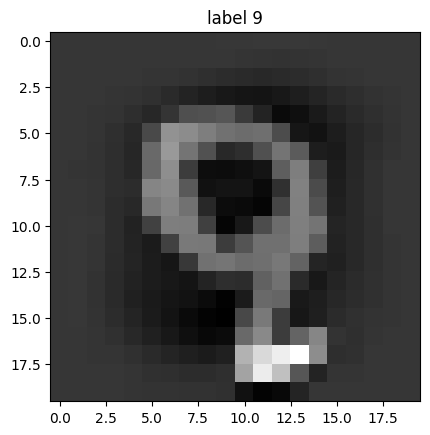

In [ ]:
# tester une image
c=0
y_pred=knn(Xt,Yt,Xtt[c],6)
print('valeur de y true '+str(Ytt[c]))
print ('valeur de y pédit '+str(y_pred))
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

**Comparaison entre résultat donné par  de la fonction knn implémentée avec la fonction knn prédefinie**

In [ ]:
# construire le y_pred avec  knn implementé
y_pred_r = np.zeros(len(Xtt), dtype=np.int64)
for i in range(len(Xtt)):
  y_pred_r[i]=knn(Xt,Yt,Xtt[i],8)

conf_matrix_perso= global_confusion_matrix(Ytt,y_pred_r,10)
accuracy_score = accuracy_score_perso(conf_matrix_perso)
recall_score = recall_score_perso(conf_matrix_perso)
precision_score = precision_score_perso(conf_matrix_perso)
false_positive_rate = false_positive_rate_perso(conf_matrix_perso)
true_negative_rate = true_negative_rate_perso(conf_matrix_perso)
print('matrice de confusion pour knn implemente donne')
print('TP=' + str(conf_matrix_perso[1][1]) + ' TN=' + str(conf_matrix_perso[0][0]) + ' FP=' + str(conf_matrix_perso[0][1]) + ' FN=' + str(conf_matrix_perso[1][0]))
print('accuracy score=' + str(accuracy_score) + ' precision_score=' + str(precision_score) + ' false_positive_rate=' + str(false_positive_rate) + ' true_negative_rate =' + str(true_negative_rate ))

matrice de confusion pour knn implemente donne
TP=130.1 TN=1330.1 FP=19.9 FN=19.9
accuracy score=0.9734666666666666 precision_score=0.8673333333333333 false_positive_rate=0.01474074074074074 true_negative_rate =0.9852592592592592


In [ ]:
# création du modèle knn prédefinie
model=KNeighborsClassifier(n_neighbors=8)
model.fit(Xt,Yt)
y_pred = model.predict(Xtt)

conf_matrix_perso= global_confusion_matrix(Ytt,y_pred,10)
accuracy_score = accuracy_score_perso(conf_matrix_perso)
recall_score = recall_score_perso(conf_matrix_perso)
precision_score = precision_score_perso(conf_matrix_perso)
false_positive_rate = false_positive_rate_perso(conf_matrix_perso)
true_negative_rate = true_negative_rate_perso(conf_matrix_perso)
print('matrice de confusion pour knn prédefinie donne')
print('accuracy score=' + str(accuracy_score) + ' precision_score=' + str(precision_score) + ' false_positive_rate=' + str(false_positive_rate) + ' true_negative_rate =' + str(true_negative_rate ))
print('TP=' + str(conf_matrix_perso[1][1]) + ' TN=' + str(conf_matrix_perso[0][0]) + ' FP=' + str(conf_matrix_perso[0][1]) + ' FN=' + str(conf_matrix_perso[1][0]))

matrice de confusion pour knn prédefinie donne
accuracy score=0.9737333333333332 precision_score=0.8686666666666667 false_positive_rate=0.014592592592592593 true_negative_rate =0.9854074074074074
TP=130.3 TN=1330.3 FP=19.7 FN=19.7


**Courbe roc des différentes classes en utilisant les prédictions de knn**

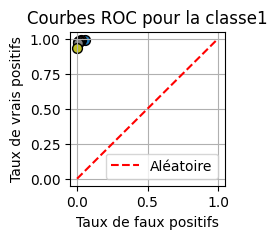

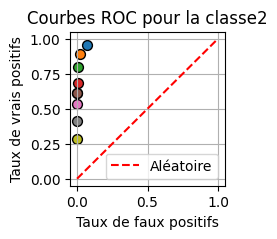

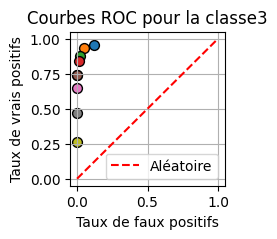

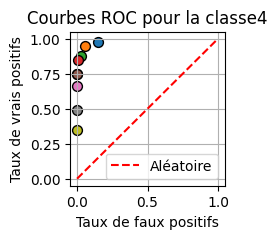

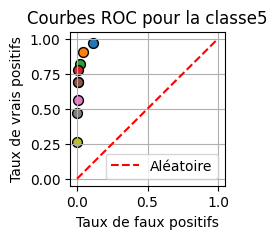

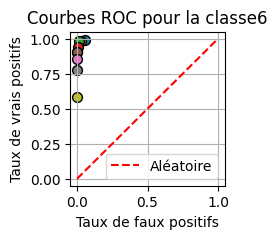

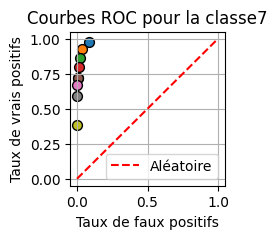

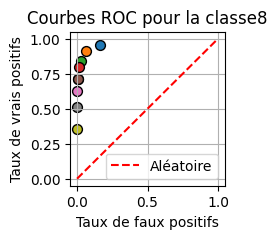

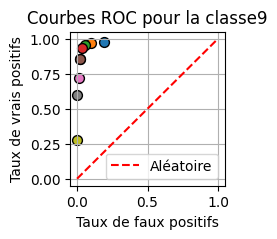

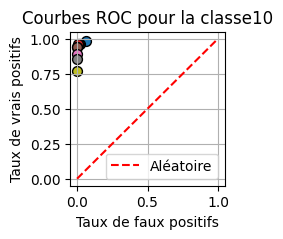

In [ ]:
y_probs = model.predict_proba(Xtt)
for i in range(1, 10+1):
  roc_curve(Ytt, y_probs, i)

# Méthode 1: MVS
Machine à Vecteurs de Support

In [ ]:
#Créer le modèle
model= svm.SVC(kernel='linear')
# entrainement
model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

9


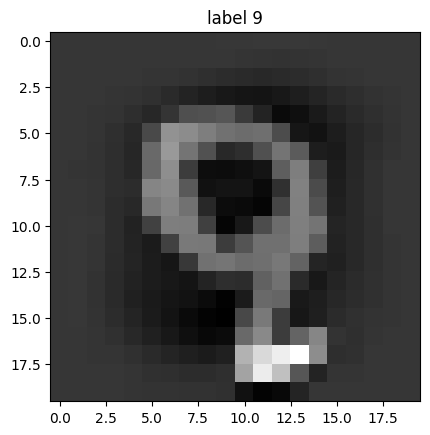

In [ ]:
# tester une image
c= 0
print (y_pred[c])
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

**Comparaison entre matrice de confusion prédefinie et implémentée en utilisant le y_pred de la méthode 1**

In [ ]:
conf_matrix_pre_def = confusion_matrix(Ytt,y_pred)

def calc_metrics_for_class(cm, classe):
    TP = cm[classe, classe]
    FN = np.sum(cm[classe, :]) - TP  # Somme de tous les éléments dans la rangée i à l'exception de l'élément diagonal [i, i]
    FP = np.sum(cm[:, classe]) - TP  # Somme de tous les éléments dans la colonne i à l'exception de l'élément diagonal [i, i]
    TN = np.sum(cm) - (TP + FN + FP)

    return TP, TN, FP, FN
TP_t=0
FN_t=0
TN_t=0
FP_t=0
for i in range(len(conf_matrix_pre_def)):
        TP, TN, FP, FN = calc_metrics_for_class(conf_matrix_pre_def, i)
        TP_t +=TP
        FP_t +=FP
        TN_t +=TN
        FN_t +=FN


TP_t /=10
FP_t /=10
TN_t /=10
FN_t /=10
print('matrice de confusion prédefinie donne')
print('TP=' + str(TP_t) + ' TN=' + str(TN_t) + ' FP=' + str(FP_t) + ' FN=' + str(FN_t))
conf_matrix_perso= global_confusion_matrix(Ytt,y_pred,10)
print('matrice de confusion implémentée donne')
print('TP=' + str(conf_matrix_perso[1][1]) + ' TN=' + str(conf_matrix_perso[0][0]) + ' FP=' + str(conf_matrix_perso[0][1]) + ' FN=' + str(conf_matrix_perso[1][0]))


matrice de confusion prédefinie donne
TP=136.9 TN=1336.9 FP=13.1 FN=13.1
matrice de confusion implémentée donne
TP=136.9 TN=1336.9 FP=13.1 FN=13.1


**Calcul des métriques pour la méthode 1**

In [ ]:
conf_matrix=global_confusion_matrix(Ytt,y_pred,10)
accuracy = accuracy_score_perso(conf_matrix)
recall= recall_score_perso(conf_matrix)
precision = precision_score_perso(conf_matrix)
false_positive_r= false_positive_rate_perso(conf_matrix)
true_negative_r = true_negative_rate_perso(conf_matrix)
print('métriques calculées pour la méthode 1')
print('accuracy score=' + str(accuracy) + ' precision_score=' + str(precision) + ' false_positive_rate=' + str(false_positive_r) + ' true_negative_rate =' + str(true_negative_r ))

métriques calculées pour la méthode 1
accuracy score=0.9825333333333335 precision_score=0.9126666666666667 false_positive_rate=0.009703703703703704 true_negative_rate =0.9902962962962963


# Méthode 2: Arbres de décision


In [ ]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

9


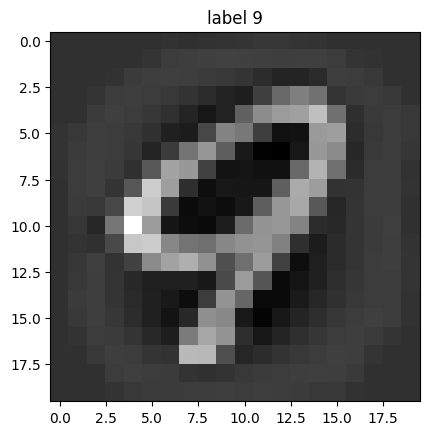

In [ ]:
# tester une image
c= 3
print (y_pred[c])
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

**Calcul métriques pour la méthode 2**

In [ ]:
conf_matrix=global_confusion_matrix(Ytt,y_pred,10)
accuracy = accuracy_score_perso(conf_matrix)
recall= recall_score_perso(conf_matrix)
precision = precision_score_perso(conf_matrix)
false_positive_r= false_positive_rate_perso(conf_matrix)
true_negative_r = true_negative_rate_perso(conf_matrix)
print('métriques calculées pour la méthode 2')
print('accuracy score=' + str(accuracy) + ' precision_score=' + str(precision) + ' false_positive_rate=' + str(false_positive_r) + ' true_negative_rate =' + str(true_negative_r ))

métriques calculées pour la méthode 2
accuracy score=0.9525333333333335 precision_score=0.7626666666666667 false_positive_rate=0.02637037037037037 true_negative_rate =0.9736296296296297


# Méthode 3: RN
Réseaux de neurones Perceptron

In [ ]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=25, max_iter=100000, solver='sgd')

In [ ]:
y_pred = model.predict(Xtt)

In [ ]:
# Choisir un image de test
c=0

In [ ]:
model.predict([Xtt[c,:]])

array([10])

In [ ]:
# pour ROC, il faudra les probabilités:
model.predict_proba([Xtt[c,:]])

array([[4.62504492e-13, 1.21162542e-18, 1.12539521e-11, 3.00658971e-10,
        4.50277247e-01, 1.27424797e-10, 5.38133461e-03, 5.78219103e-09,
        3.82189390e-16, 5.44341412e-01]])

Afficher l'image testée

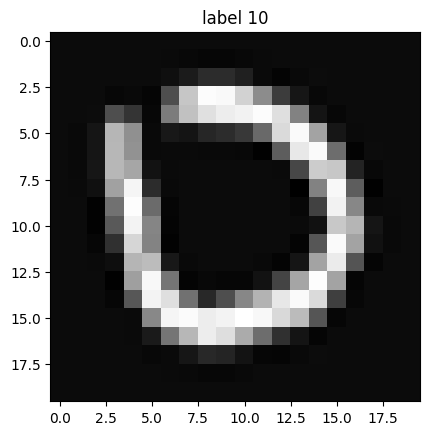

In [ ]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

**Calcul des métriques pour de la méthode 3**

In [ ]:
conf_matrix=global_confusion_matrix(Ytt,y_pred,10)
accuracy_score = accuracy_score_perso(conf_matrix)
recall_score = recall_score_perso(conf_matrix)
precision_score = precision_score_perso(conf_matrix)
false_positive_rate = false_positive_rate_perso(conf_matrix)
true_negative_rate = true_negative_rate_perso(conf_matrix)
print('métriques calculées pour la méthode 3')
print('accuracy score=' + str(accuracy_score) + ' precision_score=' + str(precision_score) + ' false_positive_rate=' + str(false_positive_rate) + ' true_negative_rate =' + str(true_negative_rate ))

métriques calculées pour la méthode 3
accuracy score=0.8598285714285713 precision_score=0.29914285714285715 false_positive_rate=0.07787301587301587 true_negative_rate =0.922126984126984


# Méthode 4: RNC
Réseaux de Neurones Convolutifs

# Appliquer les métriques implementées pour voir le résultat

In [ ]:
# elles sont appliquées en dessous de chaque méthode